**First we must import the libraries and data that we'll be using.**

In [17]:
!pip install yfinance 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import warnings
warnings.filterwarnings("ignore")
try:
    import yfinance as yf    # import  Yahoo! Finance
except:
    !pip install yfinance # install Yahoo! Finance
    import yfinance as yf    # import  Yahoo! Finance

from pandas_datareader import data as pdr
yf.pdr_override()
yf

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [19]:
# inputs
Stocks = ['SGAMY', 'SQNXF', 'TCEHY', 'SONY', 'NTDOY', 'MSFT', 'TTWO', 'EA', 'AMD', 'NVDA']

end = datetime.fromisoformat('2021-11-19')
start = datetime.fromisoformat('2018-11-17')


In [20]:
#individual company data
Sega = DataReader('SGAMY', start, end)
SquareEnix = DataReader('SQNXF', start, end)
Tencent = DataReader('TCEHY', start, end)
Sony = DataReader('SONY', start, end)
Nintendo = DataReader('NTDOY', start, end)
Microsoft = DataReader('MSFT', start, end)
TakeTwo = DataReader('TTWO', start, end)
EA = DataReader('EA', start, end)
AMD = DataReader('AMD', start, end)
Nvidia = DataReader('NVDA', start, end)

#10 Selec
df = pd.DataFrame()
data = []
for symbol in Stocks:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    # Appends tickers which have data
    data.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [21]:
df.columns = data
df = df.dropna(axis='columns')
print("The head of the data")
df.head()

The head of the data


,SGAMY,SQNXF,TCEHY,SONY,NTDOY,MSFT,TTWO,EA,AMD,NVDA
Date,,,,,,,,,,
2018-11-19,3.66,31.369181,36.183384,50.990002,36.139999,101.166916,106.000000,82.630135,19.110001,35.911991
2018-11-20,3.55,29.064066,35.241100,49.529999,33.950001,98.352951,104.720001,82.610222,19.209999,36.999023
2018-11-21,3.47,28.544188,36.847935,50.520000,34.820000,99.706741,106.839996,83.605286,18.730000,35.914467
2018-11-23,3.47,28.446100,36.728909,49.689999,35.029999,99.668060,105.500000,82.261955,19.379999,35.986443
2018-11-26,3.53,30.339235,37.988583,51.020000,36.189999,102.955833,110.440002,84.510796,20.080000,37.984306


In [22]:
print("The tail of the data")
df.tail()


The tail of the data


,SGAMY,SQNXF,TCEHY,SONY,NTDOY,MSFT,TTWO,EA,AMD,NVDA
Date,,,,,,,,,,
2021-11-12,4.06,58.630001,62.700001,122.900002,55.360001,336.105103,187.830002,145.440002,147.889999,303.899994
2021-11-15,4.18,60.290001,62.490002,122.949997,54.950001,335.456299,177.600006,141.279999,146.490005,300.250000
2021-11-16,4.15,60.290001,64.620003,125.080002,55.950001,338.890015,179.690002,139.559998,152.449997,302.029999
2021-11-17,4.19,60.290001,64.230003,124.230003,55.310001,339.119995,177.039993,138.139999,151.339996,292.609985
2021-11-18,4.26,58.380001,62.400002,125.160004,56.520000,341.269989,174.000000,137.330002,155.020004,316.750000


In [23]:
print("More details about the data.")
df.describe()

More details about the data.


,SGAMY,SQNXF,TCEHY,SONY,NTDOY,MSFT,TTWO,EA,AMD,NVDA
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,3.354590,47.723188,58.333825,75.714735,55.355648,188.729605,142.295939,116.808349,60.760966,102.237640
std,0.370697,11.343770,15.185179,22.880106,13.504399,62.795760,32.311020,21.071938,30.659197,63.675525
min,2.490000,25.738817,35.241100,42.029999,31.530001,91.023140,84.629997,74.351196,16.650000,31.570570
25%,3.030000,38.174173,44.458916,55.647500,45.457500,134.279354,116.597502,96.573467,30.965000,44.873886
50%,3.330000,49.405508,55.043554,70.275002,52.985001,181.801216,134.035004,117.074268,53.844999,87.441097
75%,3.600000,57.204762,71.005024,98.547499,68.702497,233.200607,170.682499,138.684578,84.579998,137.086922
max,4.420000,68.353134,98.835564,125.160004,82.150002,341.269989,213.339996,148.432236,155.020004,316.750000


To help us see what we're looking at, let's plot the stock prices of all 10 companies. Notice the changes in Sega are barely noticble.

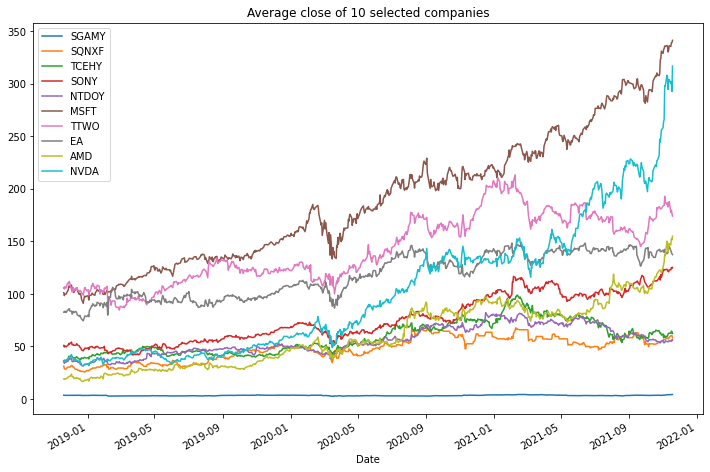

In [24]:
Sega['Adj Close'].plot(label = 'SGAMY', figsize = (12,8))
SquareEnix['Adj Close'].plot(label = 'SQNXF')
Tencent['Adj Close'].plot(label = 'TCEHY')
Sony['Adj Close'].plot(label = 'SONY')
Nintendo['Adj Close'].plot(label = 'NTDOY')
Microsoft['Adj Close'].plot(label = 'MSFT')
TakeTwo['Adj Close'].plot(label = 'TTWO')
EA['Adj Close'].plot(label = 'EA')
AMD['Adj Close'].plot(label = 'AMD')
Nvidia['Adj Close'].plot(label = "NVDA")
plt.title('Average close of 10 selected companies')
plt.legend()

**After seeing this, microsoft and nvidia seem to stick out from the rest over the year. Now let's visually examine two things. The risk involved with each stock, and the average return of each stock.**

In [25]:
rets = df.pct_change(periods=3)
corr = rets.corr()
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk v Returns')
tables = pd.DataFrame(data=d)
tables   

Table: Risk v Returns


,Risk,Expected Returns
SGAMY,0.036116,0.001316
SQNXF,0.047026,0.003885
TCEHY,0.038029,0.002992
SONY,0.031566,0.004116
NTDOY,0.033518,0.002430
MSFT,0.027447,0.005273
TTWO,0.034721,0.002653
EA,0.032870,0.002575
AMD,0.054647,0.009802
NVDA,0.048005,0.009651


Text(0, 0.5, 'SD')

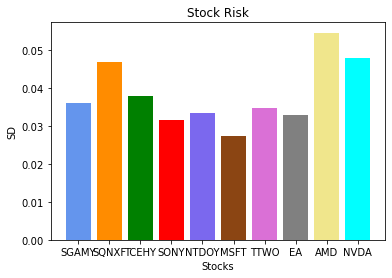

In [26]:
plt.bar(rets.columns, rets.std(), color=['cornflowerblue', 'darkorange', 'green', 'red', 'mediumslateblue', 'saddlebrown', 'orchid', 'grey', 'khaki', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stocks")
plt.ylabel("SD")

Text(0, 0.5, 'Returns')

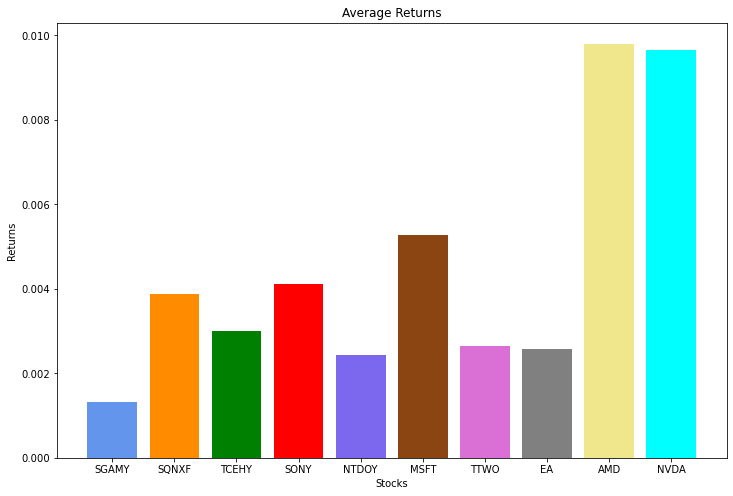

In [27]:
plt.figure(figsize=(12, 8))
plt.bar(rets.columns, rets.mean(), color=['cornflowerblue', 'darkorange', 'green', 'red', 'mediumslateblue', 'saddlebrown', 'orchid', 'grey', 'khaki', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stocks")
plt.ylabel("Returns")

**Right out of the door we see that Sega has the lowest average return.**

**Now let's look at these two peices of information together. Plotting in both a bar and a scatter plot will make it easier to see what has the highest and lowest risks and rewards.**

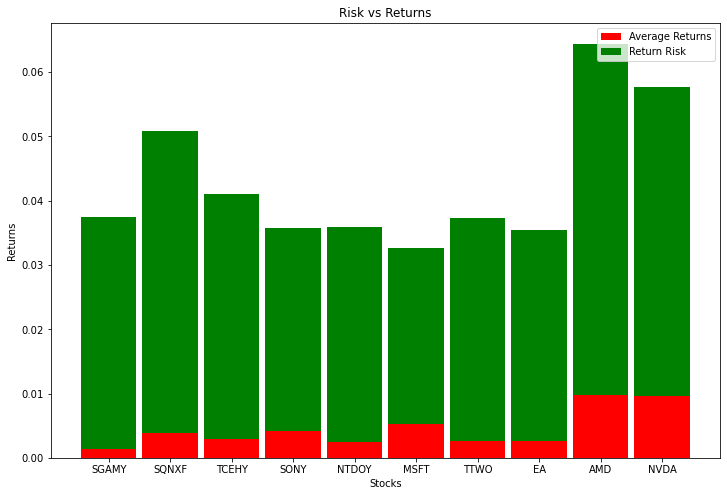

In [28]:
Stocks = ['SGAMY', 'SQNXF', 'TCEHY', 'SONY', 'NTDOY', 'MSFT', 'TTWO', 'EA', 'AMD', 'NVDA']
ind = [x for x, _ in enumerate(Stocks)]
plt.figure(figsize=(12, 8))
plt.bar(ind, rets.mean(), width=0.9, label='Average Returns', color='r')
plt.bar(ind, rets.std(), width=0.9, label='Return Risk', color='g', bottom=rets.mean())

plt.xticks(ind, Stocks)
plt.ylabel("Returns")
plt.xlabel("Stocks")
plt.legend(loc="upper right")
plt.title('Risk vs Returns')
plt.show()

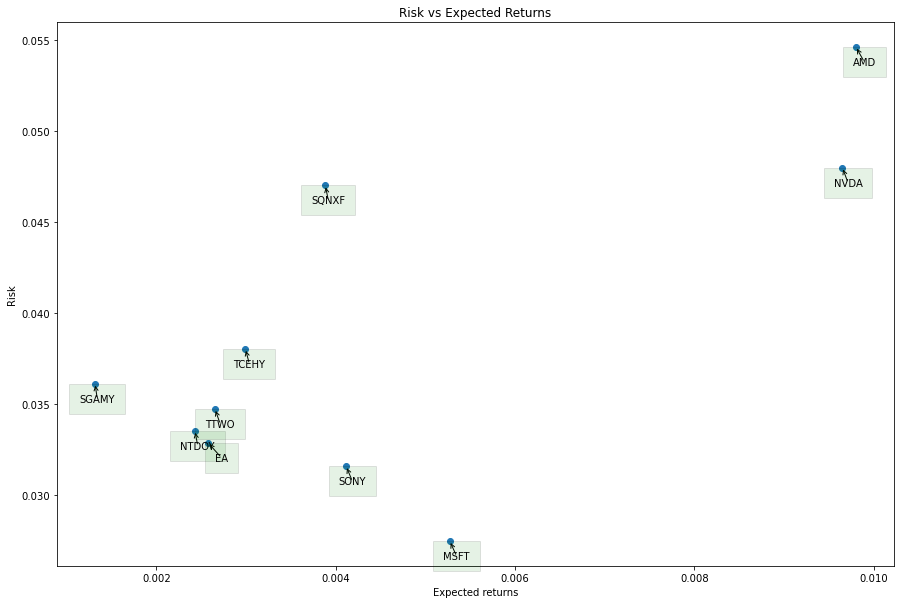

In [29]:
plt.figure(figsize=(15, 10))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'square,pad=1', fc = 'green', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    

**Investment for the week of 11/19**

After compiling my data and visualizing it I've chosen to invest in AMD, Microsoft, Nvidia, and TakeTwo. I chose Nvidia and AMD to see how things go with high risk high reward investments. I chose Microsoft because it has very little risk but seems like it has a promising return. Lastly I chose Take Two as a sort of wildcard to see where that goes. I think I should have went with Sony this week as well but we'll see what happens next week.